In [7]:
# Do not modify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# inline plotting instead of popping out
%matplotlib inline


df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv',
    sep=',')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [8]:
# Do not modify
df = df.drop(['cbwd'], axis=1)  # drop non-scalar feature
df = df.dropna(axis=0, how='any')  # drop samples who has nan feature
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,6.25,2,0


In [9]:
# Do not modify
idx = np.logical_or(
    np.logical_and(df['year'].values == 2014, df['month'].values < 3),
    np.logical_and(df['year'].values == 2013, df['month'].values == 12))
X = df.loc[idx].drop('pm2.5', axis=1)
y = df.loc[idx]['pm2.5'].values
X.head()

,No,year,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir
34320,34321,2013,12,1,0,-13,-2.0,1026.0,0.89,0,0
34321,34322,2013,12,1,1,-14,-3.0,1025.0,3.13,0,0
34322,34323,2013,12,1,2,-13,-3.0,1025.0,0.89,0,0
34323,34324,2013,12,1,3,-13,-4.0,1025.0,0.89,0,0
34324,34325,2013,12,1,4,-13,-3.0,1025.0,1.78,0,0


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Polynomial Regression
# Create polynomial features (e.g., degree=8)
poly = PolynomialFeatures(degree=8)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

# Make predictions
y_pred_poly = lin_reg.predict(X_test_poly)

# Calculate Mean Squared Error (MSE) and R^2 score for Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f'Polynomial Regression MSE: {mse_poly}')
print(f'Polynomial Regression R^2 score: {r2_poly}')

# 2. Random Forest Regressor
# Create a Random Forest Regressor with 300 trees
rf_reg = RandomForestRegressor(n_estimators=300, random_state=42)
rf_reg.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_reg.predict(X_test)

# Calculate Mean Squared Error (MSE) and R^2 score for Random Forest Regression
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Regression MSE: {mse_rf}')
print(f'Random Forest Regression R^2 score: {r2_rf}')

Polynomial Regression MSE: 3994.0558444658564
Polynomial Regression R^2 score: 0.7544410047801396
Random Forest Regression MSE: 1141.9577274647886
Random Forest Regression R^2 score: 0.9297911689120836


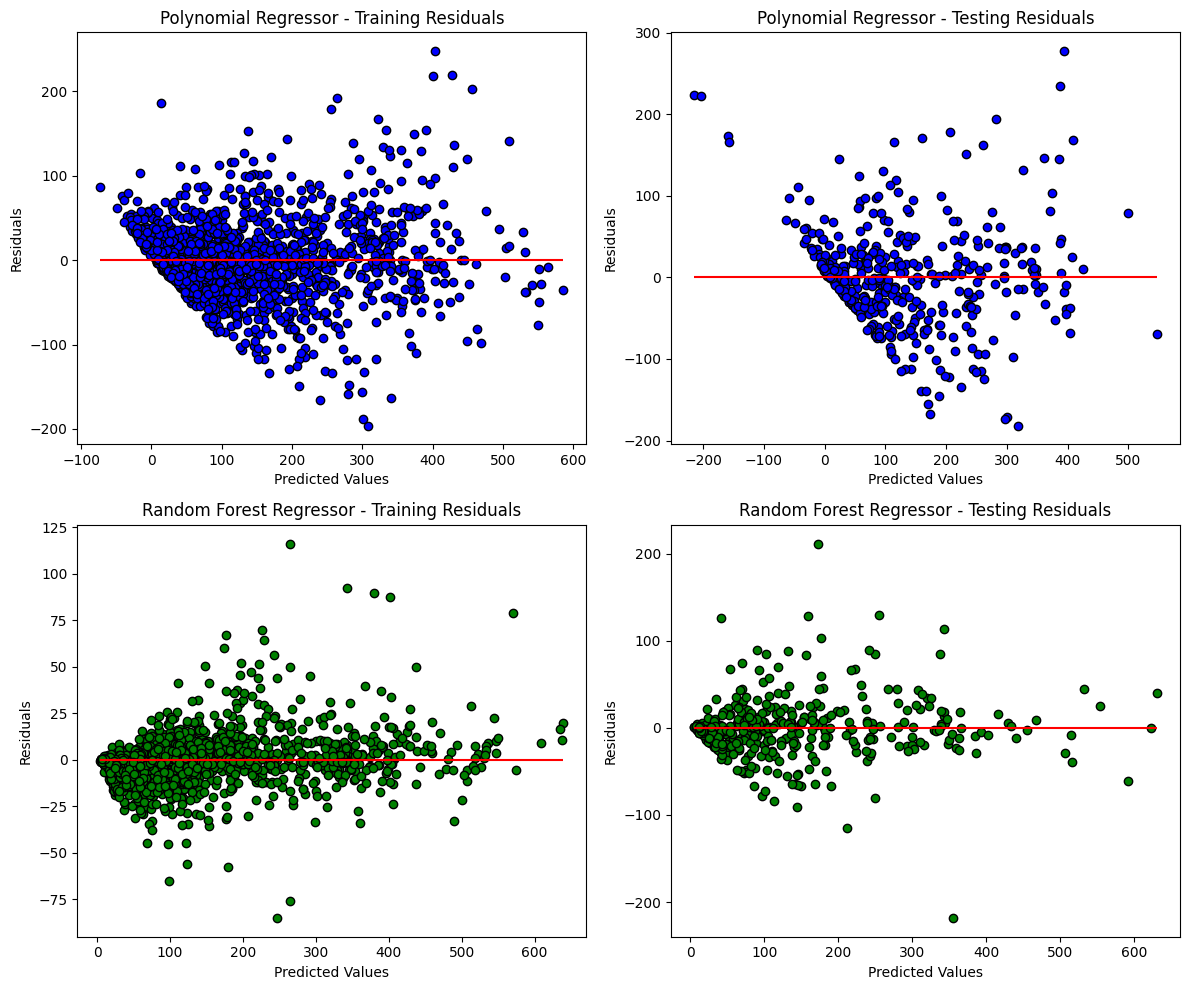

In [11]:
import matplotlib.pyplot as plt

# Polynomial Regressor: Making predictions on training and testing data
y_train_pred_poly = lin_reg.predict(X_train_poly)
y_test_pred_poly = lin_reg.predict(X_test_poly)

# 2. Random Forest Regressor: Creating and fitting the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Making predictions on training and testing data
y_train_pred_rf = rf_reg.predict(X_train)
y_test_pred_rf = rf_reg.predict(X_test)

# Calculating residuals (true values minus predicted values)
train_residuals_poly = y_train - y_train_pred_poly
test_residuals_poly = y_test - y_test_pred_poly
train_residuals_rf = y_train - y_train_pred_rf
test_residuals_rf = y_test - y_test_pred_rf

# Plotting residual plots for both models
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Polynomial Regression Residual Plot for Training Data
axs[0, 0].scatter(y_train_pred_poly, train_residuals_poly, color='blue', edgecolor='k')
axs[0, 0].hlines(y=0, xmin=y_train_pred_poly.min(), xmax=y_train_pred_poly.max(), color='red')
axs[0, 0].set_title('Polynomial Regressor - Training Residuals')
axs[0, 0].set_xlabel('Predicted Values')
axs[0, 0].set_ylabel('Residuals')

# Polynomial Regression Residual Plot for Testing Data
axs[0, 1].scatter(y_test_pred_poly, test_residuals_poly, color='blue', edgecolor='k')
axs[0, 1].hlines(y=0, xmin=y_test_pred_poly.min(), xmax=y_test_pred_poly.max(), color='red')
axs[0, 1].set_title('Polynomial Regressor - Testing Residuals')
axs[0, 1].set_xlabel('Predicted Values')
axs[0, 1].set_ylabel('Residuals')

# Random Forest Regression Residual Plot for Training Data
axs[1, 0].scatter(y_train_pred_rf, train_residuals_rf, color='green', edgecolor='k')
axs[1, 0].hlines(y=0, xmin=y_train_pred_rf.min(), xmax=y_train_pred_rf.max(), color='red')
axs[1, 0].set_title('Random Forest Regressor - Training Residuals')
axs[1, 0].set_xlabel('Predicted Values')
axs[1, 0].set_ylabel('Residuals')

# Random Forest Regression Residual Plot for Testing Data
axs[1, 1].scatter(y_test_pred_rf, test_residuals_rf, color='green', edgecolor='k')
axs[1, 1].hlines(y=0, xmin=y_test_pred_rf.min(), xmax=y_test_pred_rf.max(), color='red')
axs[1, 1].set_title('Random Forest Regressor - Testing Residuals')
axs[1, 1].set_xlabel('Predicted Values')
axs[1, 1].set_ylabel('Residuals')

# Adjust the layout of the plots
plt.tight_layout()
plt.show()